ccuracy score can be misleading in the context of imbalanced data because it does not provide a complete picture of the model's performance. In imbalanced datasets, where one class is significantly more prevalent than the others, a model that simply predicts the majority class for every instance can achieve a high accuracy score. However, this does not indicate that the model is effective in identifying the minority class or capturing the true underlying patterns in the data.

Consider an example where you have a dataset with 95% of instances belonging to class A and only 5% belonging to class B. If you train a model that always predicts class A, you will achieve 95% accuracy. However, this model completely fails to detect instances of class B, which may be the more critical class in certain applications, such as fraud detection or medical diagnosis.

Let's consider an example to demonstrate how accuracy can be unreliable in the context of imbalanced data. We'll use the popular scikit-learn library to build and evaluate a binary classification model.

In this example, we create an imbalanced dataset with 950 instances of the majority class (class 0) and only 50 instances of the minority class (class 1). We then split the data into training and testing sets, train a logistic regression model, and make predictions on the test set. Finally, we calculate and print various evaluation metrics.

/home/veer/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


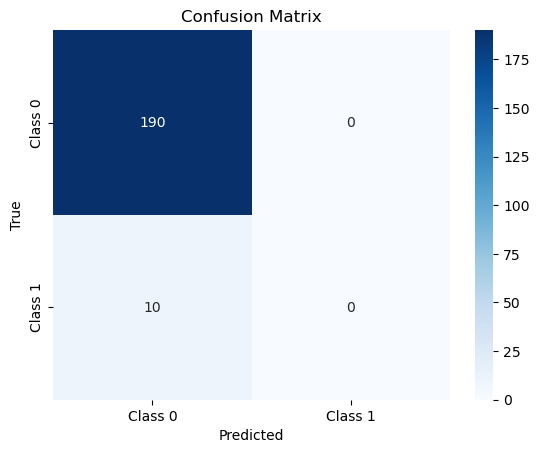

Accuracy: 0.95
Precision: 0.00
Recall: 0.00
F1-Score: 0.00


In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



# Generate imbalanced data
X = np.random.randn(1000, 5)  # Features
y = np.concatenate([np.zeros(950), np.ones(50)])  # Imbalanced target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
# Visualize confusion matrix
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(f"Accuracy: {accuracy:.2f}")

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
